# 3 - Math

## Problem

“The Pirates law” says that if you have a treasure, the captain must choose a group of pirates and give the same amount of coins to each of them until there’s no more coins available to give all of them exactly the same quantity of coins. So, the coins remaining will go to the captain’s pocket.

Morgan (the captain) must split a treasure with less than 1000 golden coins. He knows that if he chose a group of 99 pirates, 51 coins are going to be for him and if he chose 77 pirates, only 29 coins will remain for him.

Objective : How many pirates the Captain should select to achieve the maximum number of coins given “The pirate law”? And given the number of pirates, how many coins he will get? 

Note: Pirates must have at least 1 coin each.

Please explain the logic process for the answer and justify it. Charts with explanations will be a nice Plus ;)

## Solution

The first thing we've got to do is find out the number of coins in the treasure. In order to do that we're going to use the information given on the problem. 

Mathematically speaking, if we have an X amount of coins (called the dividend) and divide it over a Y amount of pirates (called the divisor) we get a quotient (number of coins for each pirate) and a remainder (number of coins left over, which go to the captain).

We now have to find out for which number of coins the following checks out: "Morgan (the captain) must split a treasure with less than 1000 golden coins. He knows that if he chose a group of 99 pirates, 51 coins are going to be for him and if he chose 77 pirates, only 29 coins will remain for him."

In [1]:
import numpy as np
import seaborn as sns; sns.set(); sns.set_style("darkgrid", {"axes.facecolor": ".95"})
import matplotlib.pyplot as plt

In [2]:
for treasure_coins in range(1, 1000): # We choose this range because we now the treasure has less than 1000 coins
    cond_1 = False # cond_1 will be True if there are 77 pirates and the capitain gets 29 coins
    cond_2 = False # cond_2 will be True if there are 99 pirates and the capitain gets 51 coins
    for num_pirates in range(1, 1000): # We choose this range because every pirate must get at least one coin
        pirates_coins = treasure_coins // num_pirates # Quotient
        captain_coins = treasure_coins % num_pirates # Remainder
        if pirates_coins > 0:
            if (num_pirates==77 and captain_coins==29):
                cond_1 = True
            if (num_pirates==99 and captain_coins==51):
                cond_2 = True
    if cond_1 and cond_2:
        print("The number of coins is %i." % treasure_coins)
            

The number of coins is 645.


Now we now just how many coins there are in the treasure. So, the next step is to find out which number of pirates gets the captain the biggest amount of coins.

In order to do that we will create an array and populate with the number of coins the captain gets splitting the loot between 1 and 645 pirates. (Again, every pirate must get at least one coin)

In [3]:
treasure_coins = 645
captain_coins = np.zeros(645)

for i in range(1, 646):
    captain_coins[i-1] = treasure_coins % i # We substract 1 from i in order to stay within the array bounds   

Once we've done that, we will check for the biggest (or maximum) value in said array.

In [4]:
max_captain_coins = np.amax(captain_coins)
print("The maximum amount of coins for the captain is %i." % max_captain_coins)

max_mon_piratas = np.where(captain_coins == max_captain_coins)
print("He gets that amount by splitting the coins between %i pirates." % (max_mon_piratas[0][0]+1))

The maximum amount of coins for the captain is 322.
He gets that amount by splitting the coins between 323 pirates.


Which checks out. If the captain gives 1 coin each to 323 pirates then 322 coins are left from the treasure, which he gets to keep.

Lastly, we can make a graph to see the amount of coins the captain gets depending on the number of pirates.

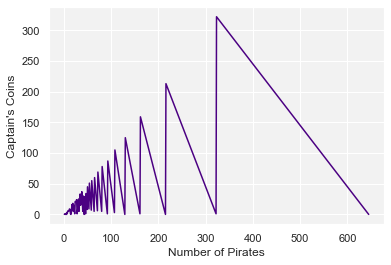

In [5]:
num_pirates = np.arange(1, 646)
sns.lineplot(num_pirates, captain_coins, color="indigo")
plt.xlabel('Number of Pirates')
plt.ylabel("Captain's Coins")
plt.show()